In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
opt_prices_iv  = pd.read_csv('opt_prices550_iv.csv')
opt_prices_iv = opt_prices_iv.set_index('date')
opt_prices_iv.index = pd.to_datetime(opt_prices_iv.index)

<Axes: xlabel='date'>

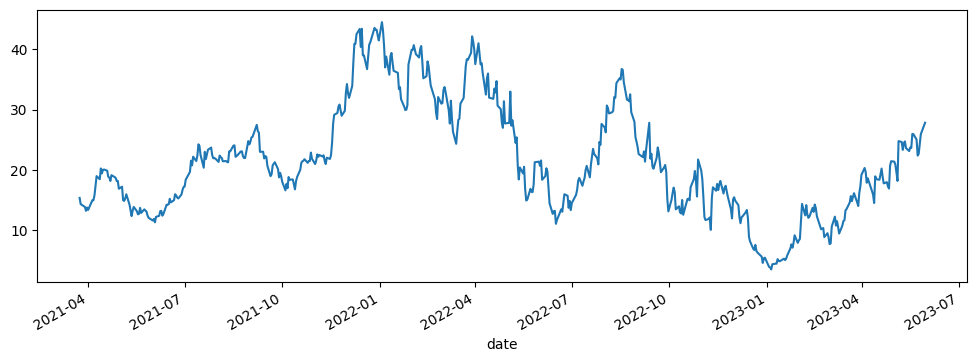

In [ ]:
opt_prices_iv.price.plot(figsize=(12, 4))


In [ ]:
import ruptures as rpt

def breaks_detection(opt_prices_iv, model_):
    ts = opt_prices_iv['price']
    y = np.array(ts.tolist())

    algo = rpt.Pelt(model=model_) #rbf #l2 #l1
    algo.fit(y)
    breaks = algo.predict(pen=3)

    breaks_rpt = []
    for i in breaks:
        breaks_rpt.append(ts.index[i-1])
    breaks_rpt = pd.to_datetime(breaks_rpt)
    return breaks_rpt


In [ ]:
#rbf

rbf_breaks = breaks_detection(opt_prices_iv, 'rbf')

opt_prices_iv['rbf_breaks'] = np.zeros(opt_prices_iv.shape[0])

for break_date in rbf_breaks:
    opt_prices_iv.loc[break_date,['rbf_breaks']] = 1

In [ ]:
#l1

l1_breaks = breaks_detection(opt_prices_iv, 'l1')

opt_prices_iv['l1_breaks'] = np.zeros(opt_prices_iv.shape[0])

for break_date in l1_breaks:
    opt_prices_iv.loc[break_date,['l1_breaks']] = 1

In [ ]:
#l2

l2_breaks = breaks_detection(opt_prices_iv, 'l2')

opt_prices_iv['l2_breaks'] = np.zeros(opt_prices_iv.shape[0])

for break_date in l2_breaks:
    opt_prices_iv.loc[break_date,['l2_breaks']] = 1

In [ ]:
opt_prices_iv.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 550 entries, 2021-03-24 to 2023-05-30
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   price       550 non-null    float64
 1   underlying  550 non-null    float64
 2   daysToExp   550 non-null    int64  
 3   bsm_iv      550 non-null    float64
 4   rbf_breaks  550 non-null    float64
 5   l1_breaks   550 non-null    float64
 6   l2_breaks   550 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 50.5 KB


In [ ]:
opt_prices_iv.describe()

,price,underlying,daysToExp,bsm_iv,rbf_breaks,l1_breaks,l2_breaks
count,550.000000,550.000000,550.00000,550.000000,550.000000,550.000000,550.000000
mean,21.490073,150.252214,416.80000,0.045253,0.032727,0.109091,0.141818
std,9.125141,14.683202,230.47865,0.054189,0.178084,0.312037,0.349181
min,3.550000,118.310265,17.00000,0.010000,0.000000,0.000000,0.000000
25%,14.912500,140.819153,219.25000,0.010000,0.000000,0.000000,0.000000
50%,20.325000,148.702873,416.50000,0.010000,0.000000,0.000000,0.000000
75%,26.867500,162.408073,616.75000,0.079975,0.000000,0.000000,0.000000
max,44.500000,180.434311,814.00000,0.230700,1.000000,1.000000,1.000000


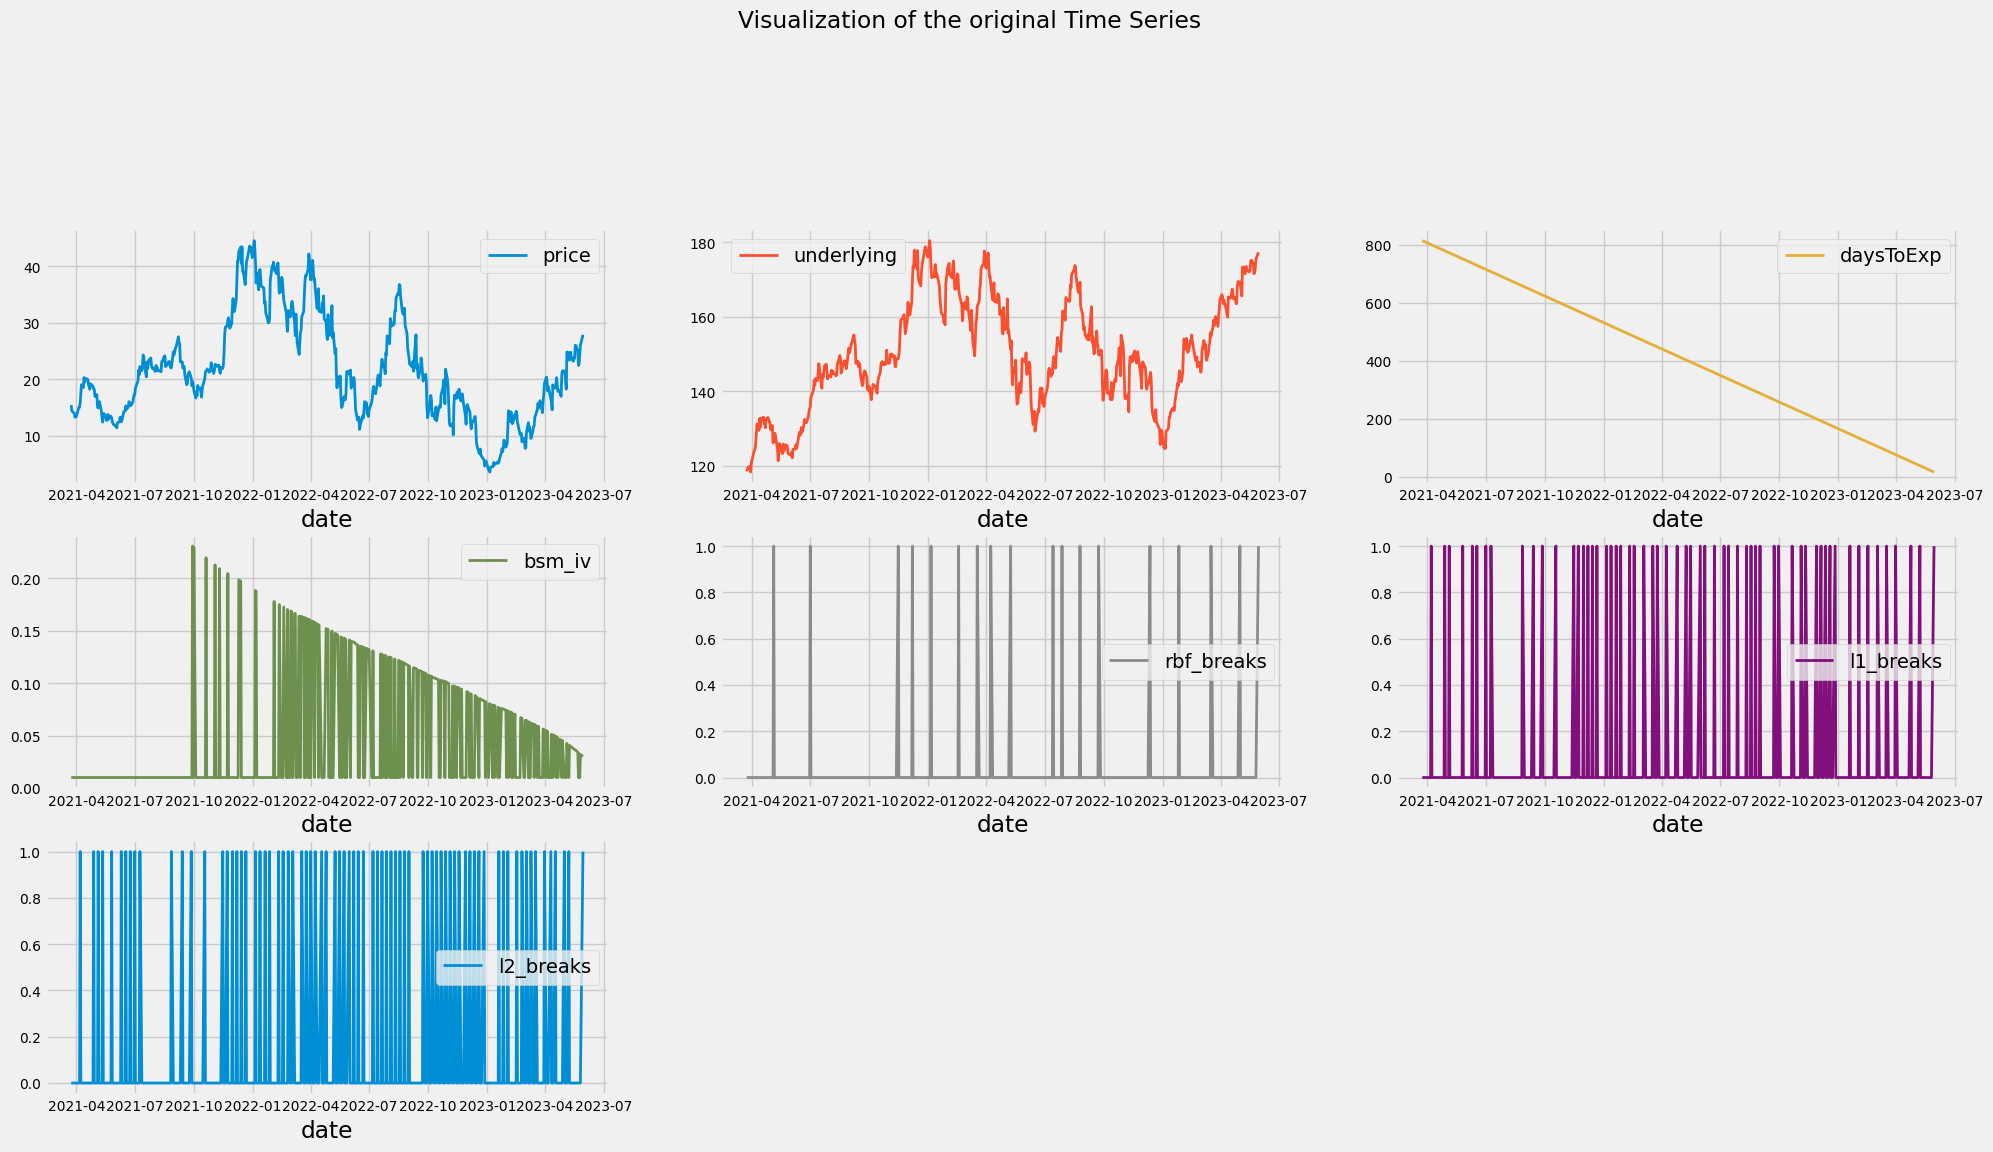

In [ ]:
# Plot the time series
plt.style.use('fivethirtyeight')
opt_prices_iv.plot(subplots=True,
        layout=(6, 3),
        figsize=(22,22),
        fontsize=10,
        linewidth=2,
        sharex=False,
        title='Visualization of the original Time Series')
plt.show()

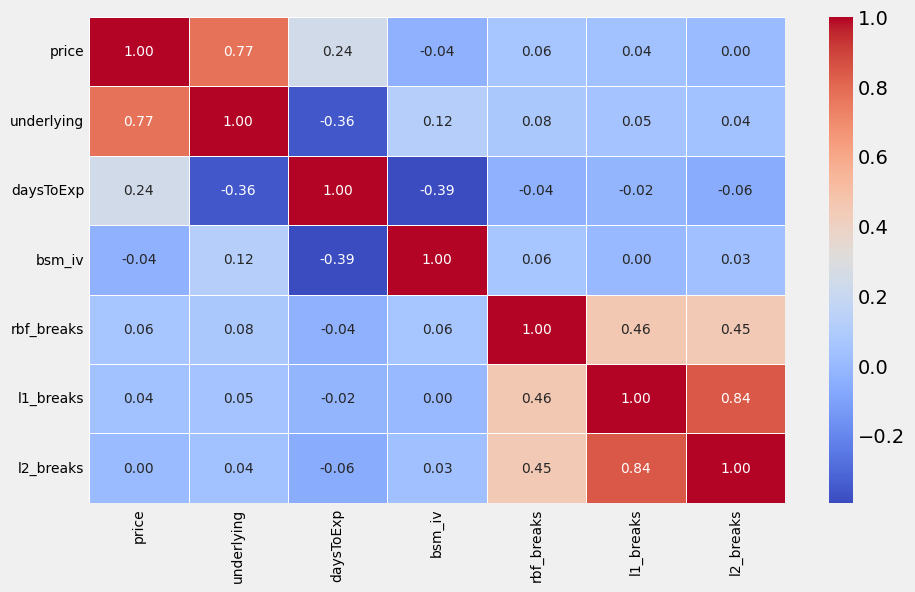

In [ ]:
# Let's also draw a heatmap visualization of the correlation matrix
corr_matrix = opt_prices_iv.corr(method='spearman')
f, ax = plt.subplots(figsize=(10, 6))

colormap = sns.color_palette("coolwarm" , as_cmap=True ) #"Reds" "tab10" "vlag"

sns.heatmap(corr_matrix, annot=True, fmt='.2f', linewidth=0.4,
            annot_kws={"size": 10}, cmap=colormap,  ax=ax) #cmap='coolwarm' cmap="crest",
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# LSTM

In [ ]:
opt_prices_iv[opt_prices_iv.l2_breaks == 1]

,price,underlying,daysToExp,bsm_iv,rbf_breaks,l1_breaks,l2_breaks
date,,,,,,,
2021-04-07,15.80,126.204201,800,0.0100,0.0,1.0,1.0
2021-04-28,18.19,131.808884,779,0.0100,0.0,1.0,1.0
2021-05-05,14.90,126.401535,772,0.0100,1.0,1.0,1.0
2021-05-12,12.38,121.347977,765,0.0100,0.0,0.0,1.0
2021-05-26,13.15,125.380707,751,0.0100,0.0,1.0,1.0
...,...,...,...,...,...,...,...
2023-04-10,16.50,161.806183,67,0.0100,0.0,0.0,1.0
2023-04-17,18.40,165.001770,60,0.0494,0.0,0.0,1.0
2023-05-01,21.40,169.355743,46,0.0100,1.0,0.0,1.0


<Axes: xlabel='date'>

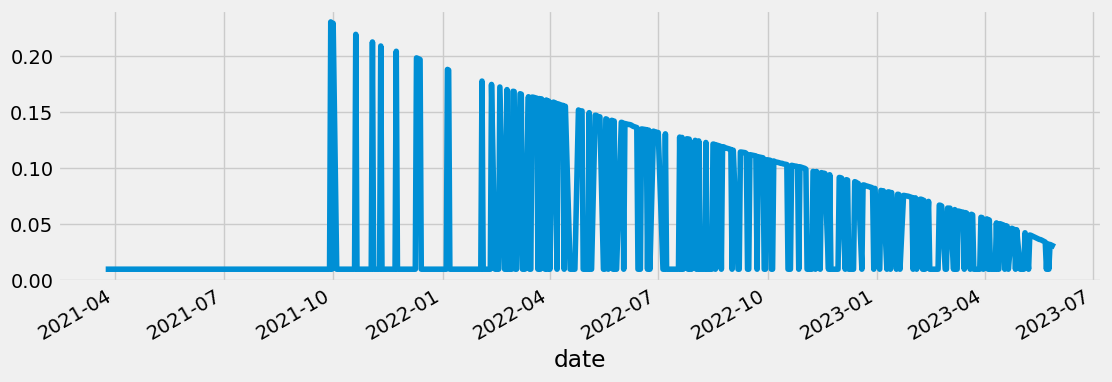

In [ ]:
opt_prices_iv.bsm_iv.plot(figsize=(12, 4))

In [ ]:
data = opt_prices_iv['2021-09-24':]

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam

In [ ]:
# Assuming your DataFrame is named 'data' with the 'rbf_break' column and date as the index

# Prepare the data
target_variable = 'l2_breaks'
data = data[[target_variable]]  # Keep only the target variable column
data = data.astype(float)  # Convert target variable to float if necessary

In [ ]:

# Split the data
train_size = int(len(data) * 0.8)  # 80% of data for training
train_data = data[:train_size]
test_data = data[train_size:]

In [ ]:

# Prepare the data for LSTM
window_size = 10  # Number of previous time steps to consider for prediction


In [ ]:
def create_dataset(X, y, window_size):
    X_data, y_data = [], []
    for i in range(len(X) - window_size):
        X_data.append(X[i:i+window_size])
        y_data.append(y[i+window_size])
    return np.array(X_data), np.array(y_data)

In [ ]:

X_train, y_train = create_dataset(train_data.values, train_data.values, window_size)
X_test, y_test = create_dataset(test_data.values, test_data.values, window_size)

In [ ]:


# Design the LSTM model
model = Sequential()
model.add(LSTM(units=64, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [ ]:


# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=1)

Epoch 1/50
21/21 [==============================] - 2s 7ms/step - loss: 0.6233 - accuracy: 0.8287
Epoch 2/50
21/21 [==============================] - 0s 6ms/step - loss: 0.4812 - accuracy: 0.8379
Epoch 3/50
21/21 [==============================] - 0s 6ms/step - loss: 0.4639 - accuracy: 0.8379
Epoch 4/50
21/21 [==============================] - 0s 7ms/step - loss: 0.4601 - accuracy: 0.8379
Epoch 5/50
21/21 [==============================] - 0s 10ms/step - loss: 0.4448 - accuracy: 0.8379
Epoch 6/50
21/21 [==============================] - 0s 9ms/step - loss: 0.4438 - accuracy: 0.8379
Epoch 7/50
21/21 [==============================] - 0s 9ms/step - loss: 0.4475 - accuracy: 0.8379
Epoch 8/50
21/21 [==============================] - 0s 9ms/step - loss: 0.4359 - accuracy: 0.8379
Epoch 9/50
21/21 [==============================] - 0s 9ms/step - loss: 0.4271 - accuracy: 0.8379
Epoch 10/50
21/21 [==============================] - 0s 9ms/step - loss: 0.4165 - accuracy: 0.8379
Epoch 11/50
21/21 

In [ ]:

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).flatten()

3/3 [==============================] - 1s 7ms/step


In [ ]:

# Evaluate the model
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)

Accuracy: 0.7496888888888888


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def calculate_confusion_matrix(y_true, y_pred):
    """
    Calculate the confusion matrix for binary classification.
    """
    # Convert to NumPy arrays if not already
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    # Initialize counts
    tn = 0  # True negatives
    fp = 0  # False positives
    fn = 0  # False negatives
    tp = 0  # True positives
    
    # Calculate counts
    for true_val, pred_val in zip(y_true, y_pred):
        if true_val == 0 and pred_val == 0:
            tn += 1
        elif true_val == 0 and pred_val == 1:
            fp += 1
        elif true_val == 1 and pred_val == 0:
            fn += 1
        elif true_val == 1 and pred_val == 1:
            tp += 1
    
    # Create a pandas DataFrame for the confusion matrix
    confusion_matrix = pd.DataFrame(
        {
            'Predicted 0': [tn, fn],
            'Predicted 1': [fp, tp]
        },
        index=['Actual 0', 'Actual 1']
    )
    
    return confusion_matrix


# Assuming you have 'y_test' as the true labels and 'y_pred' as the predicted labels

# Calculate the confusion matrix
confusion_matrix = calculate_confusion_matrix(y_test, y_pred)
print(confusion_matrix)

          Predicted 0  Predicted 1
Actual 0           60            4
Actual 1            4            7


# LSTM with vol

In [ ]:
data=opt_prices_iv['2021-09-24':]

In [ ]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import Adam

# Assuming your DataFrame is named 'data' with the 'rbf_break' and 'bsm_iv' columns, and date as the index

# Prepare the data
target_variable = 'l2_breaks'
feature_variables = ['bsm_iv']

data = data[[target_variable] + feature_variables]  # Keep target variable and selected feature variables
data = data.astype(float)  # Convert to float if necessary

# Split the data
train_size = int(len(data) * 0.8)  # 80% of data for training
train_data = data[:train_size]
test_data = data[train_size:]

# Prepare the data for LSTM
window_size = 10  # Number of previous time steps to consider for prediction

def create_dataset(X, y, window_size):
    X_data, y_data = [], []
    for i in range(len(X) - window_size):
        X_data.append(X[i:i+window_size])
        y_data.append(y[i+window_size])
    return np.array(X_data), np.array(y_data)

X_train, y_train = create_dataset(train_data[feature_variables + [target_variable]].values, train_data[target_variable].values, window_size)
X_test, y_test = create_dataset(test_data[feature_variables + [target_variable]].values, test_data[target_variable].values, window_size)

# Design the LSTM model
model = Sequential()
model.add(LSTM(units=64, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=1)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).flatten()

# Evaluate the model
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)

Epoch 1/50
21/21 [==============================] - 4s 6ms/step - loss: 0.6139 - accuracy: 0.8226
Epoch 2/50
21/21 [==============================] - 0s 6ms/step - loss: 0.4852 - accuracy: 0.8379
Epoch 3/50
21/21 [==============================] - 0s 6ms/step - loss: 0.4599 - accuracy: 0.8379
Epoch 4/50
21/21 [==============================] - 0s 6ms/step - loss: 0.4444 - accuracy: 0.8379
Epoch 5/50
21/21 [==============================] - 0s 6ms/step - loss: 0.4405 - accuracy: 0.8379
Epoch 6/50
21/21 [==============================] - 0s 6ms/step - loss: 0.4328 - accuracy: 0.8379
Epoch 7/50
21/21 [==============================] - 0s 6ms/step - loss: 0.4223 - accuracy: 0.8379
Epoch 8/50
21/21 [==============================] - 0s 6ms/step - loss: 0.3984 - accuracy: 0.8379
Epoch 9/50
21/21 [==============================] - 0s 6ms/step - loss: 0.3653 - accuracy: 0.8379
Epoch 10/50
21/21 [==============================] - 0s 6ms/step - loss: 0.3237 - accuracy: 0.8838
Epoch 11/50
21/21 [

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred = np.round(y_pred).flatten()

3/3 [==============================] - 0s 5ms/step


In [ ]:
# Evaluate the model
accuracy = np.mean(y_pred == y_test)
print("Accuracy:", accuracy)

Accuracy: 0.8933333333333333


In [ ]:
confusion_matrix = calculate_confusion_matrix(y_test, y_pred)
print(confusion_matrix)

          Predicted 0  Predicted 1
Actual 0           60            4
Actual 1            4            7
